In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

############################ loading data ############################
test = pd.read_csv("test.csv")

In [2]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872749 entries, 0 to 872748
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   travel_purpose       872749 non-null  object
 1   starting_point       872749 non-null  object
 2   ending_point         872749 non-null  object
 3   transportation_mode  872749 non-null  object
 4   start_time           872749 non-null  object
 5   end_time             872749 non-null  object
 6   travel_time          872749 non-null  int64 
 7   waiting_time         872749 non-null  int64 
 8   social_class         872749 non-null  object
 9   local_size           872749 non-null  object
 10  sex                  872749 non-null  object
 11  age                  872749 non-null  object
dtypes: int64(2), object(10)
memory usage: 79.9+ MB


### the old vs others ##

In [5]:
lower_classes = ['Low Class', 'Lower-Medium Class']
upper_classes = ['Upper-Medium Class', 'High Class']

In [6]:
lower_test = test[test['social_class'].isin(lower_classes)]
upper_test = test[test['social_class'].isin(upper_classes)]

In [7]:
def undersample(df, target):
    # 获取每个类别的索引
    class_indices = [df[df[target] == label].index for label in df[target].unique()]
    undersampled_size = min(len(indices) for indices in class_indices)
    
    # 欠采样
    undersampled_indices = [indices[:undersampled_size] for indices in class_indices]
    undersampled_indices = np.concatenate(undersampled_indices)
    
    return df.loc[undersampled_indices]

In [9]:
lower_data_undersampled = undersample(lower_test, 'travel_purpose')
print("欠采样后的样本数量: ", len(lower_data_undersampled))

欠采样后的样本数量:  30400


In [10]:
upper_data_undersampled = undersample(upper_test, 'travel_purpose')
print("欠采样后的样本数量: ", len(upper_data_undersampled))

欠采样后的样本数量:  22760


In [12]:
lower_testing = lower_data_undersampled.drop(
    [
    "travel_purpose",
    "social_class"
    ],
    axis = 1
)

lower_testing_numeric = pd.get_dummies(lower_testing)
lower_testing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30400 entries, 901 to 872729
Data columns (total 65 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   travel_time                                                            30400 non-null  int64
 1   waiting_time                                                           30400 non-null  int64
 2   starting_point_Construction Site                                       30400 non-null  bool 
 3   starting_point_Cultural Center or Leisure Area                         30400 non-null  bool 
 4   starting_point_Factory or Workshop                                     30400 non-null  bool 
 5   starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory  30400 non-null  bool 
 6   starting_point_Office                                                  30400 non-null  bool 
 7   starti

In [13]:
upper_testing = upper_data_undersampled.drop(
    [
    "travel_purpose",
    "social_class"
    ],
    axis = 1
)

upper_testing_numeric = pd.get_dummies(upper_testing)
upper_testing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22760 entries, 0 to 862442
Data columns (total 63 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   travel_time                                                            22760 non-null  int64
 1   waiting_time                                                           22760 non-null  int64
 2   starting_point_Construction Site                                       22760 non-null  bool 
 3   starting_point_Cultural Center or Leisure Area                         22760 non-null  bool 
 4   starting_point_Factory or Workshop                                     22760 non-null  bool 
 5   starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory  22760 non-null  bool 
 6   starting_point_Office                                                  22760 non-null  bool 
 7   starting

In [15]:
lower_testing_final = lower_testing_numeric.drop(
    [
        "starting_point_Cultural Center or Leisure Area",
        "ending_point_Cultural Center or Leisure Area",
        "transportation_mode_Bus",
        "start_time_Afternoon",
        "end_time_Afternoon",
        "age_Adult",
        "local_size_Over 100000 people",
        "sex_Female"
    ],
    axis=1
    )

lower_testing_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30400 entries, 901 to 872729
Data columns (total 57 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   travel_time                                                            30400 non-null  int64
 1   waiting_time                                                           30400 non-null  int64
 2   starting_point_Construction Site                                       30400 non-null  bool 
 3   starting_point_Factory or Workshop                                     30400 non-null  bool 
 4   starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory  30400 non-null  bool 
 5   starting_point_Office                                                  30400 non-null  bool 
 6   starting_point_Other Enclosures                                        30400 non-null  bool 
 7   starti

In [17]:
upper_testing_final = upper_testing_numeric.drop(
    [
        "starting_point_Cultural Center or Leisure Area",
        "ending_point_Cultural Center or Leisure Area",
        "transportation_mode_Bus",
        "start_time_Afternoon",
        "end_time_Afternoon",
        "age_Adult",
        "local_size_Over 100000 people",
        "sex_Female"
    ],
    axis=1
    )

upper_testing_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22760 entries, 0 to 862442
Data columns (total 55 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   travel_time                                                            22760 non-null  int64
 1   waiting_time                                                           22760 non-null  int64
 2   starting_point_Construction Site                                       22760 non-null  bool 
 3   starting_point_Factory or Workshop                                     22760 non-null  bool 
 4   starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory  22760 non-null  bool 
 5   starting_point_Office                                                  22760 non-null  bool 
 6   starting_point_Other Enclosures                                        22760 non-null  bool 
 7   starting

In [18]:
# 将所有布尔列转换为整型
lower_testing_final_int = lower_testing_final.astype(int)

# 确认转换后的数据类型
print(lower_testing_final_int.dtypes)

travel_time                                                              int64
waiting_time                                                             int64
starting_point_Construction Site                                         int64
starting_point_Factory or Workshop                                       int64
starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory    int64
starting_point_Office                                                    int64
starting_point_Other Enclosures                                          int64
starting_point_Other Services                                            int64
starting_point_Others                                                    int64
starting_point_Public Transportation Hub or Station                      int64
starting_point_Religious Area                                            int64
starting_point_Restaurant, Bar, Cafe                                     int64
starting_point_School                               

In [19]:
# 将所有布尔列转换为整型
upper_testing_final_int = upper_testing_final.astype(int)

# 确认转换后的数据类型
print(upper_testing_final_int.dtypes)

travel_time                                                              int64
waiting_time                                                             int64
starting_point_Construction Site                                         int64
starting_point_Factory or Workshop                                       int64
starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory    int64
starting_point_Office                                                    int64
starting_point_Other Enclosures                                          int64
starting_point_Other Services                                            int64
starting_point_Others                                                    int64
starting_point_Public Transportation Hub or Station                      int64
starting_point_Religious Area                                            int64
starting_point_Restaurant, Bar, Cafe                                     int64
starting_point_School                               

In [20]:
############################ calculating VIF #############################
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [22]:
# using VIF on the testing dataset
lower_df_predictors_selected_VIF = drop_column_using_vif_(lower_testing_final_int)

Dropping: starting_point_Your Home
Dropping: start_time_Morning
Dropping: end_time_Night


In [21]:
# using VIF on the testing dataset
upper_df_predictors_selected_VIF = drop_column_using_vif_(upper_testing_final_int)

Dropping: start_time_Morning
Dropping: starting_point_Your Home
Dropping: end_time_Night


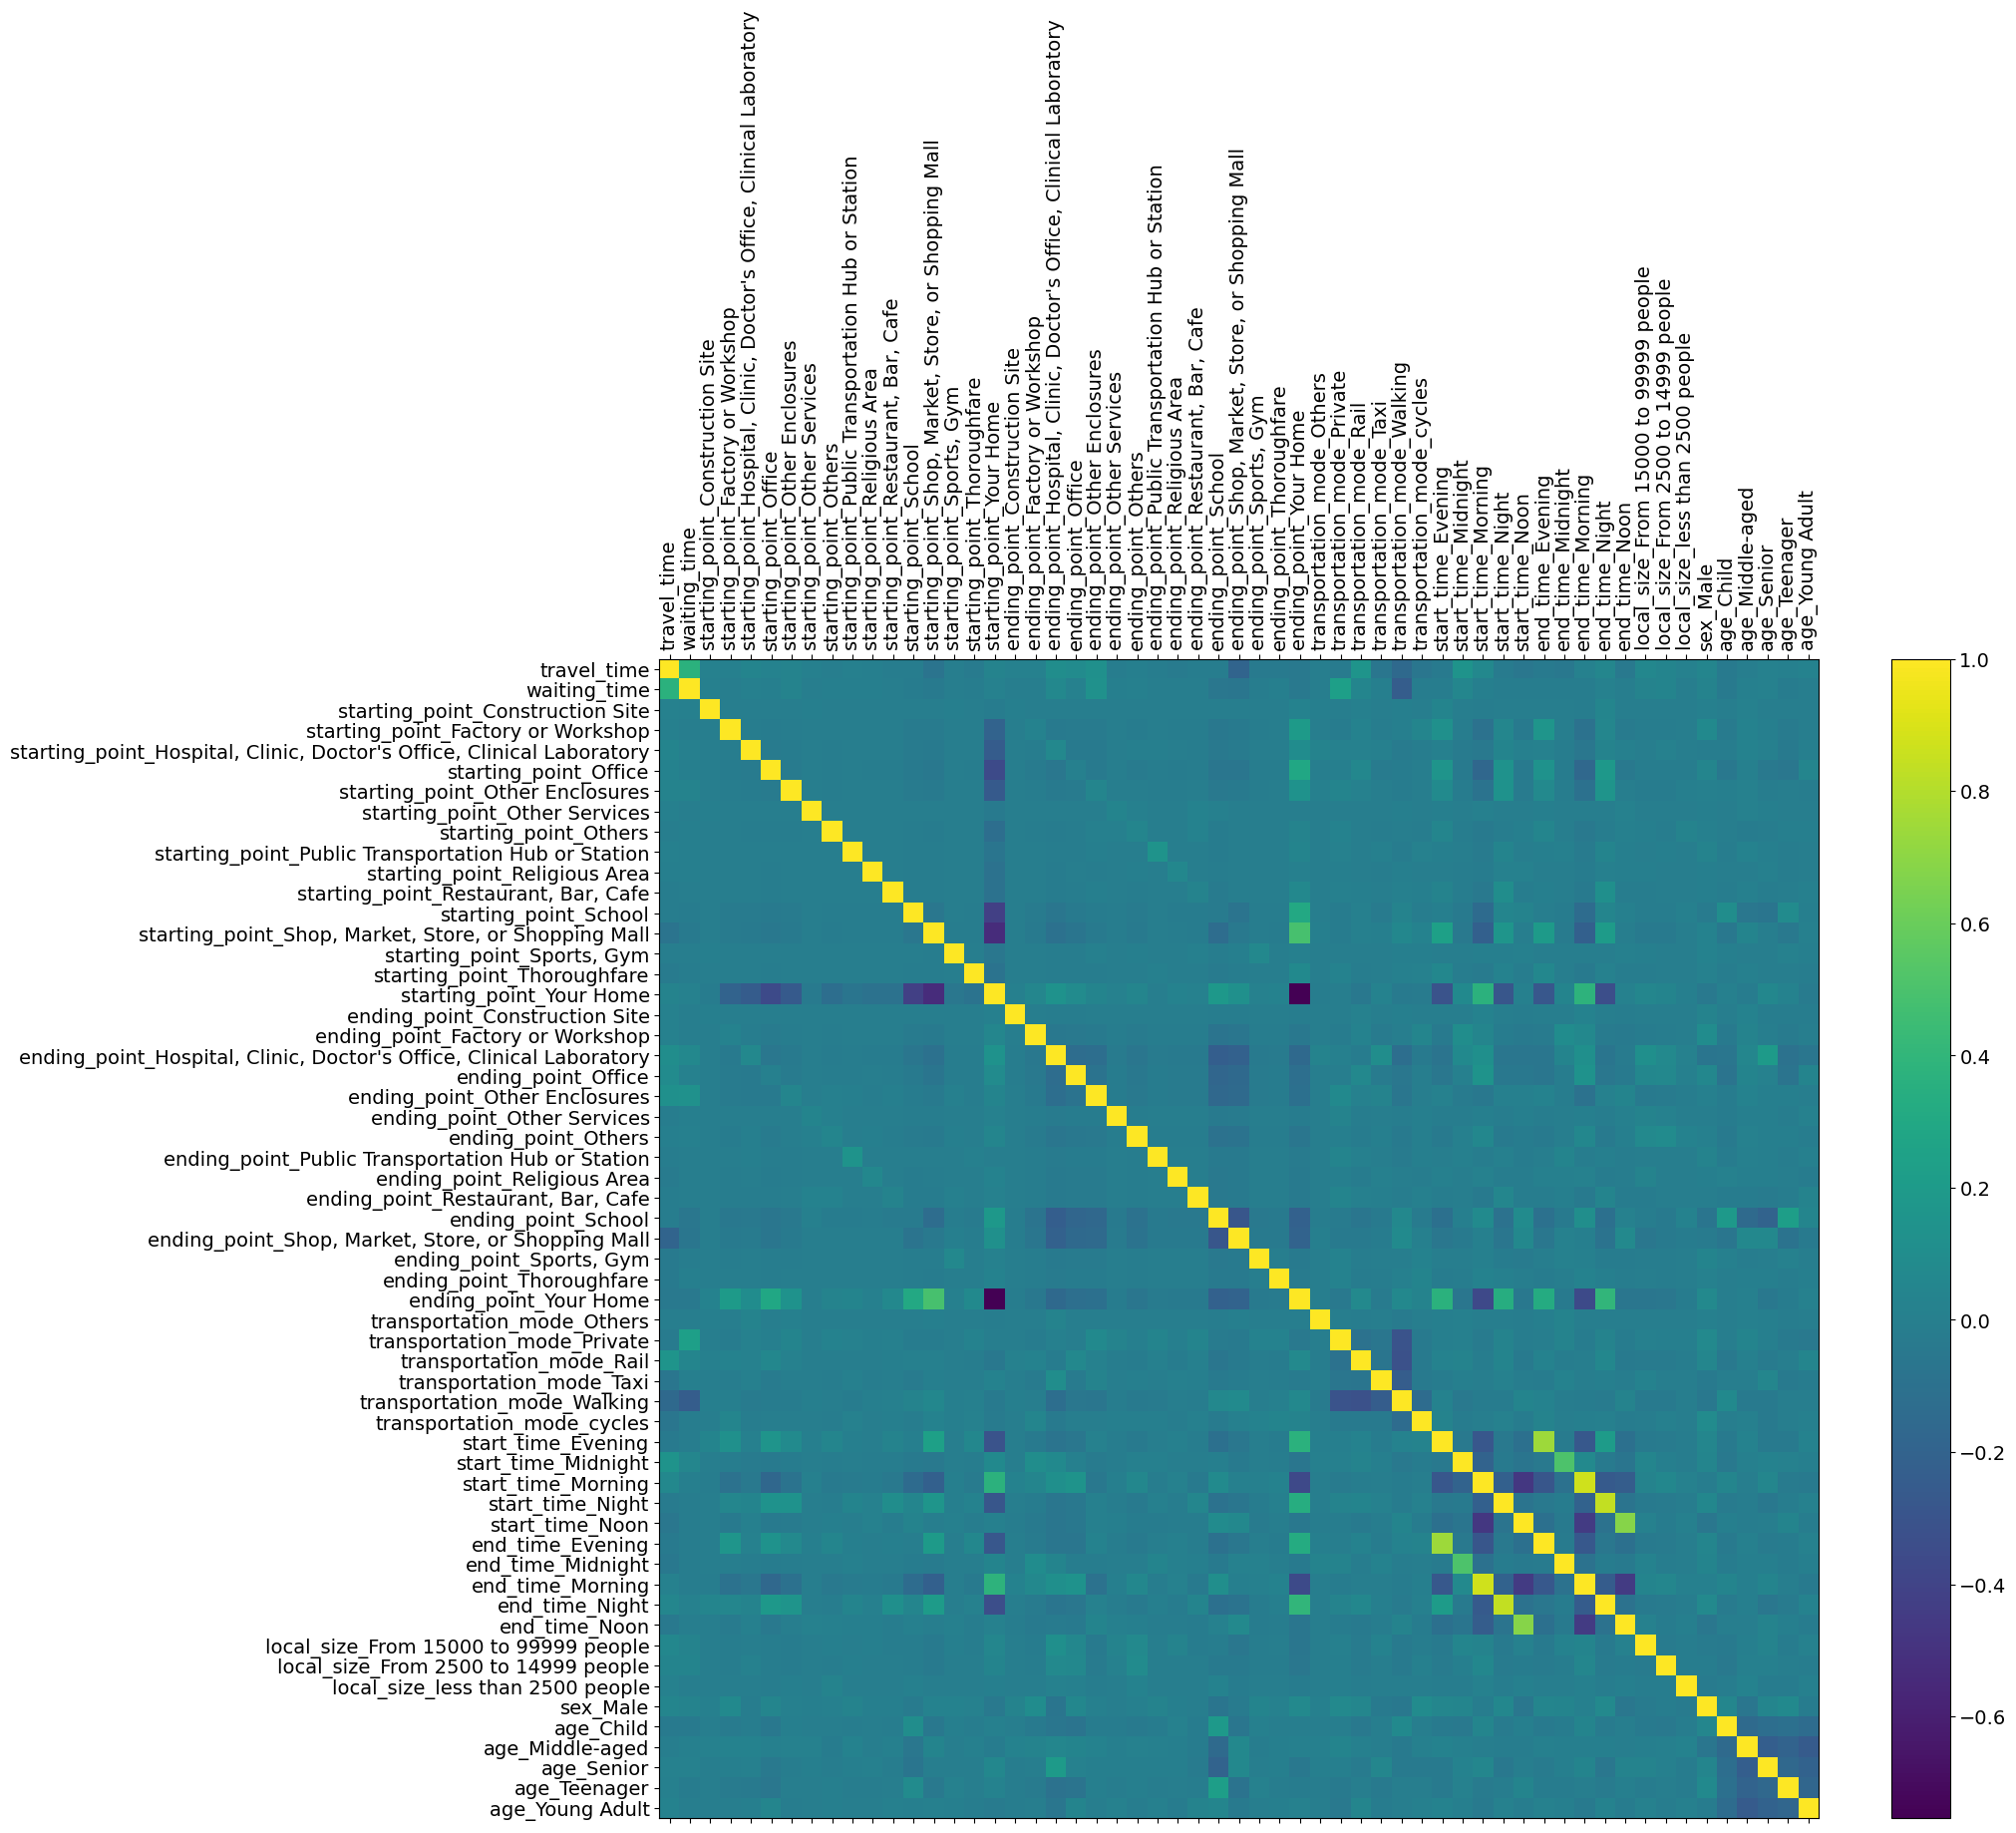

In [25]:
############# Checking the correlation between variables ##############
df = lower_testing_final_int
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.savefig('correlation_lower.png', bbox_inches='tight', dpi=300) 

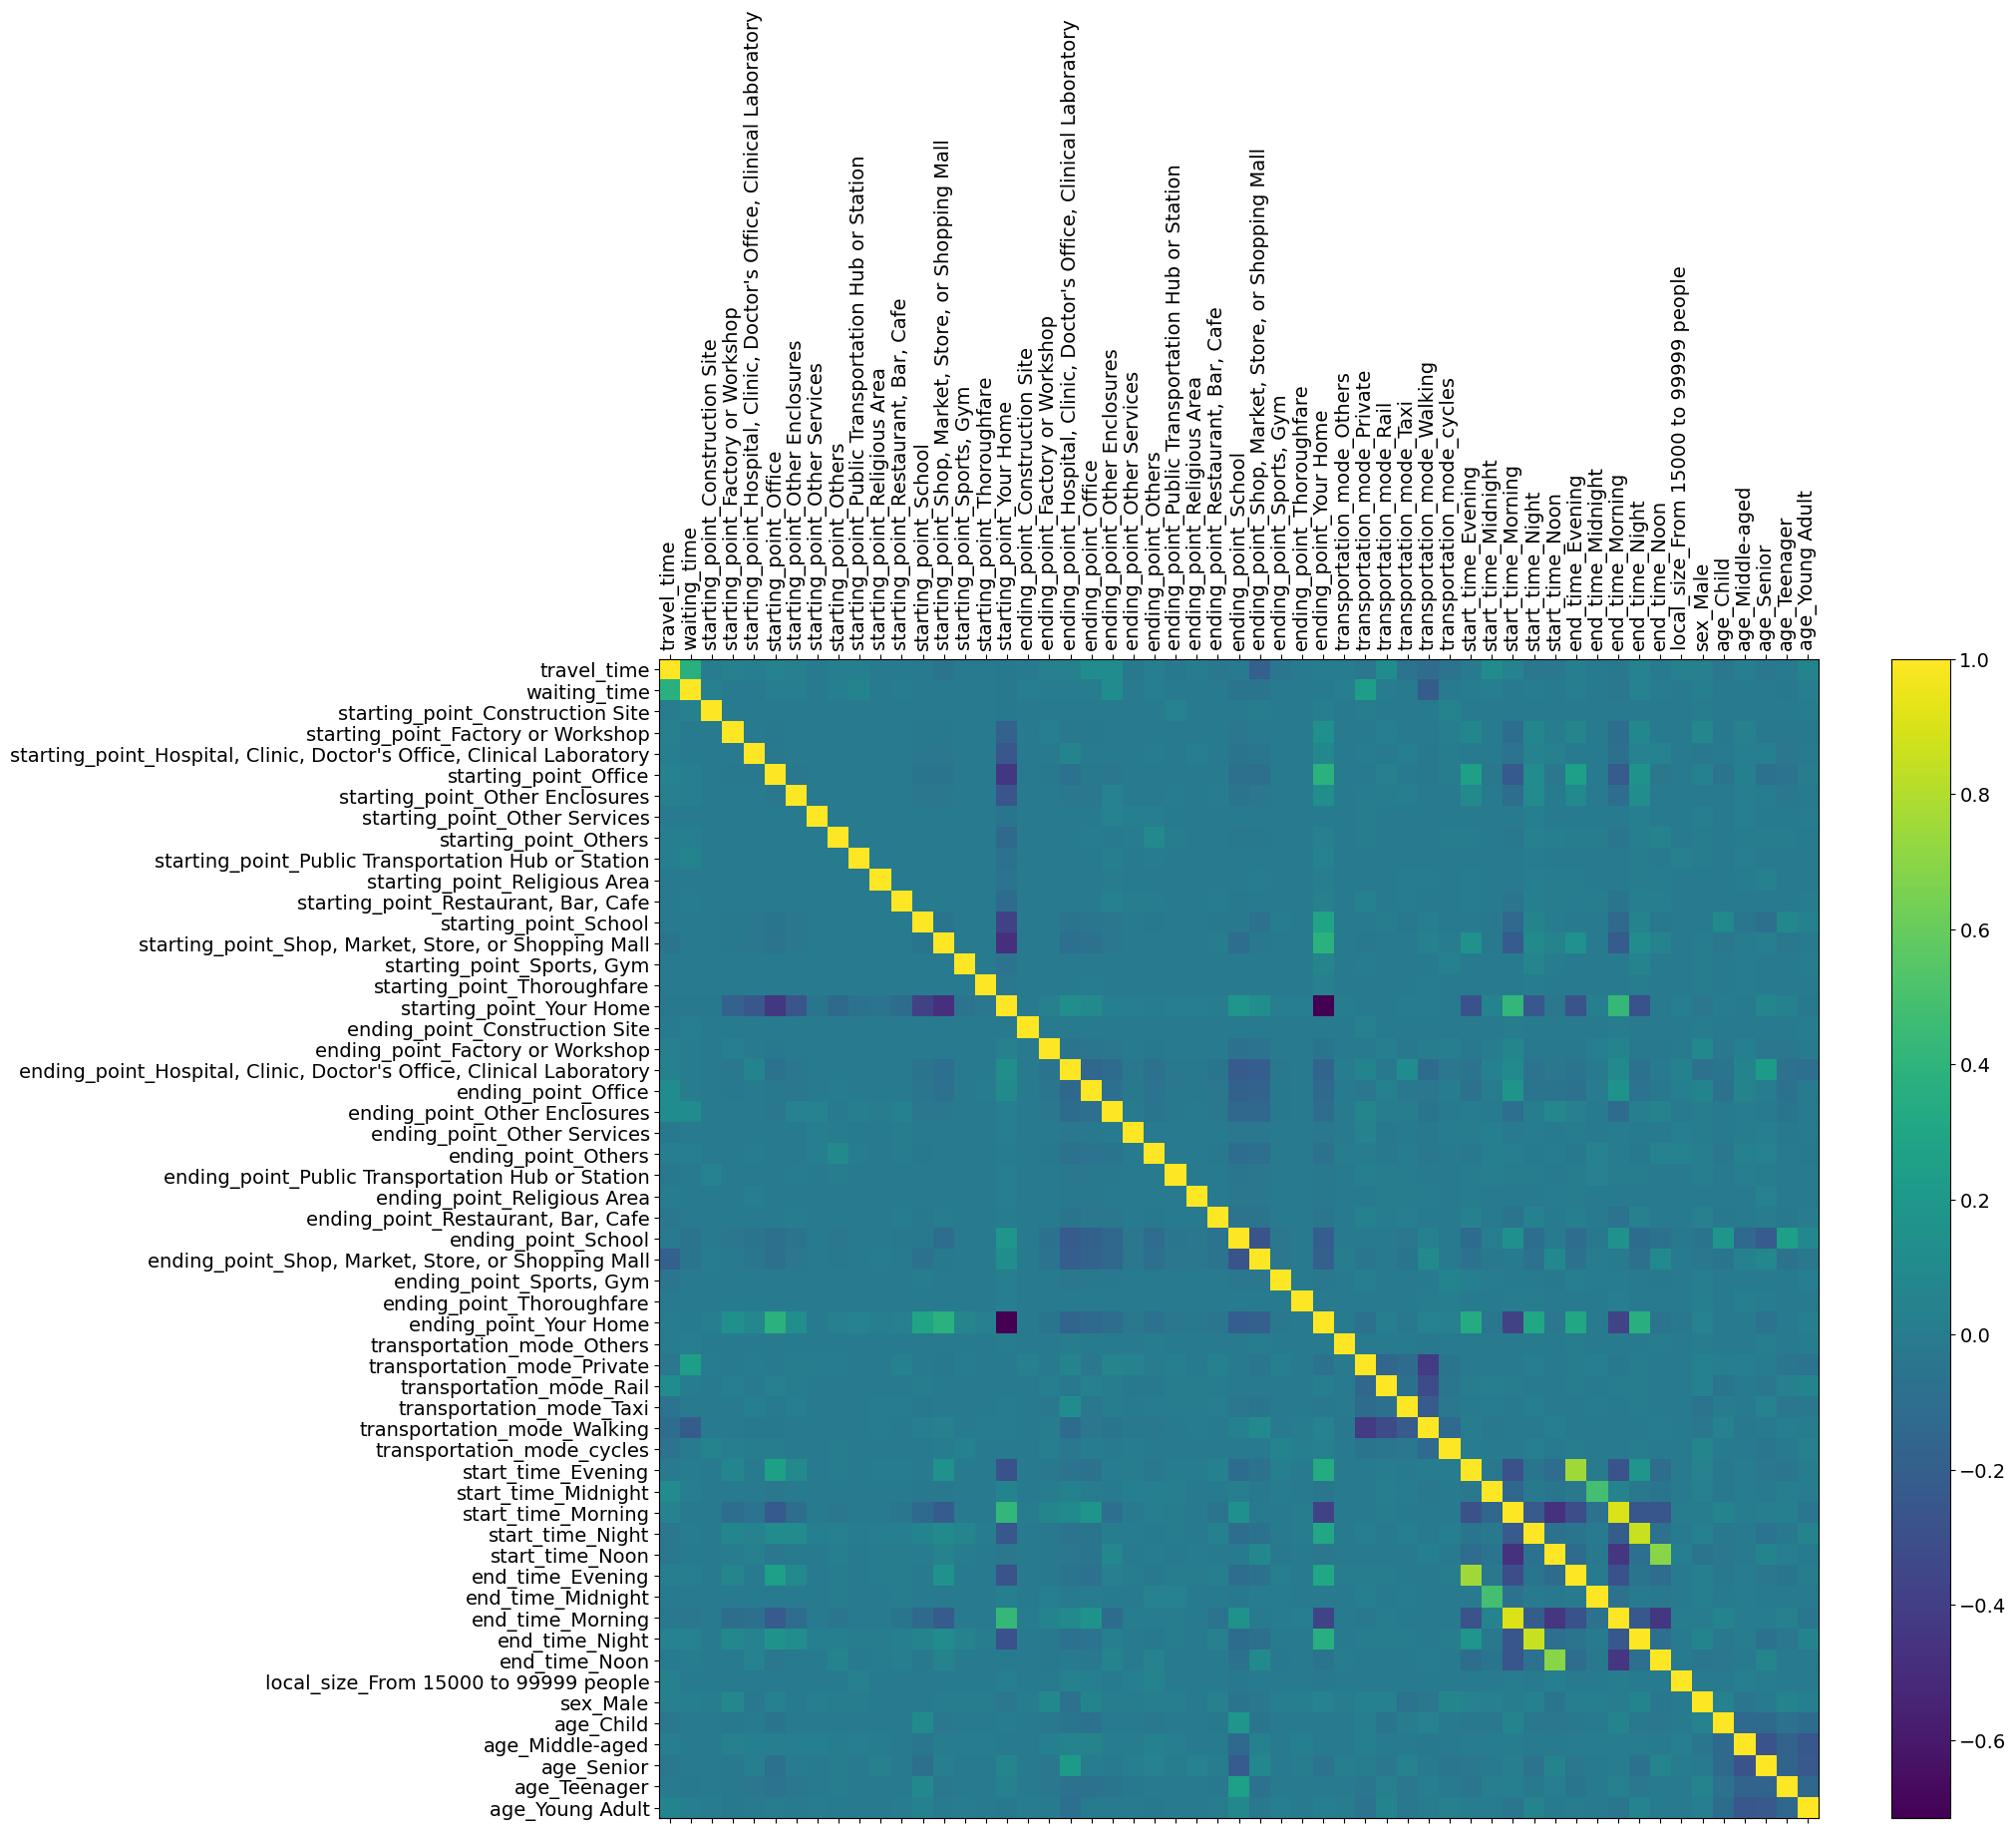

In [24]:
############# Checking the correlation between variables ##############
df = upper_testing_final_int
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.savefig('correlation_upper.png', bbox_inches='tight', dpi=300) 

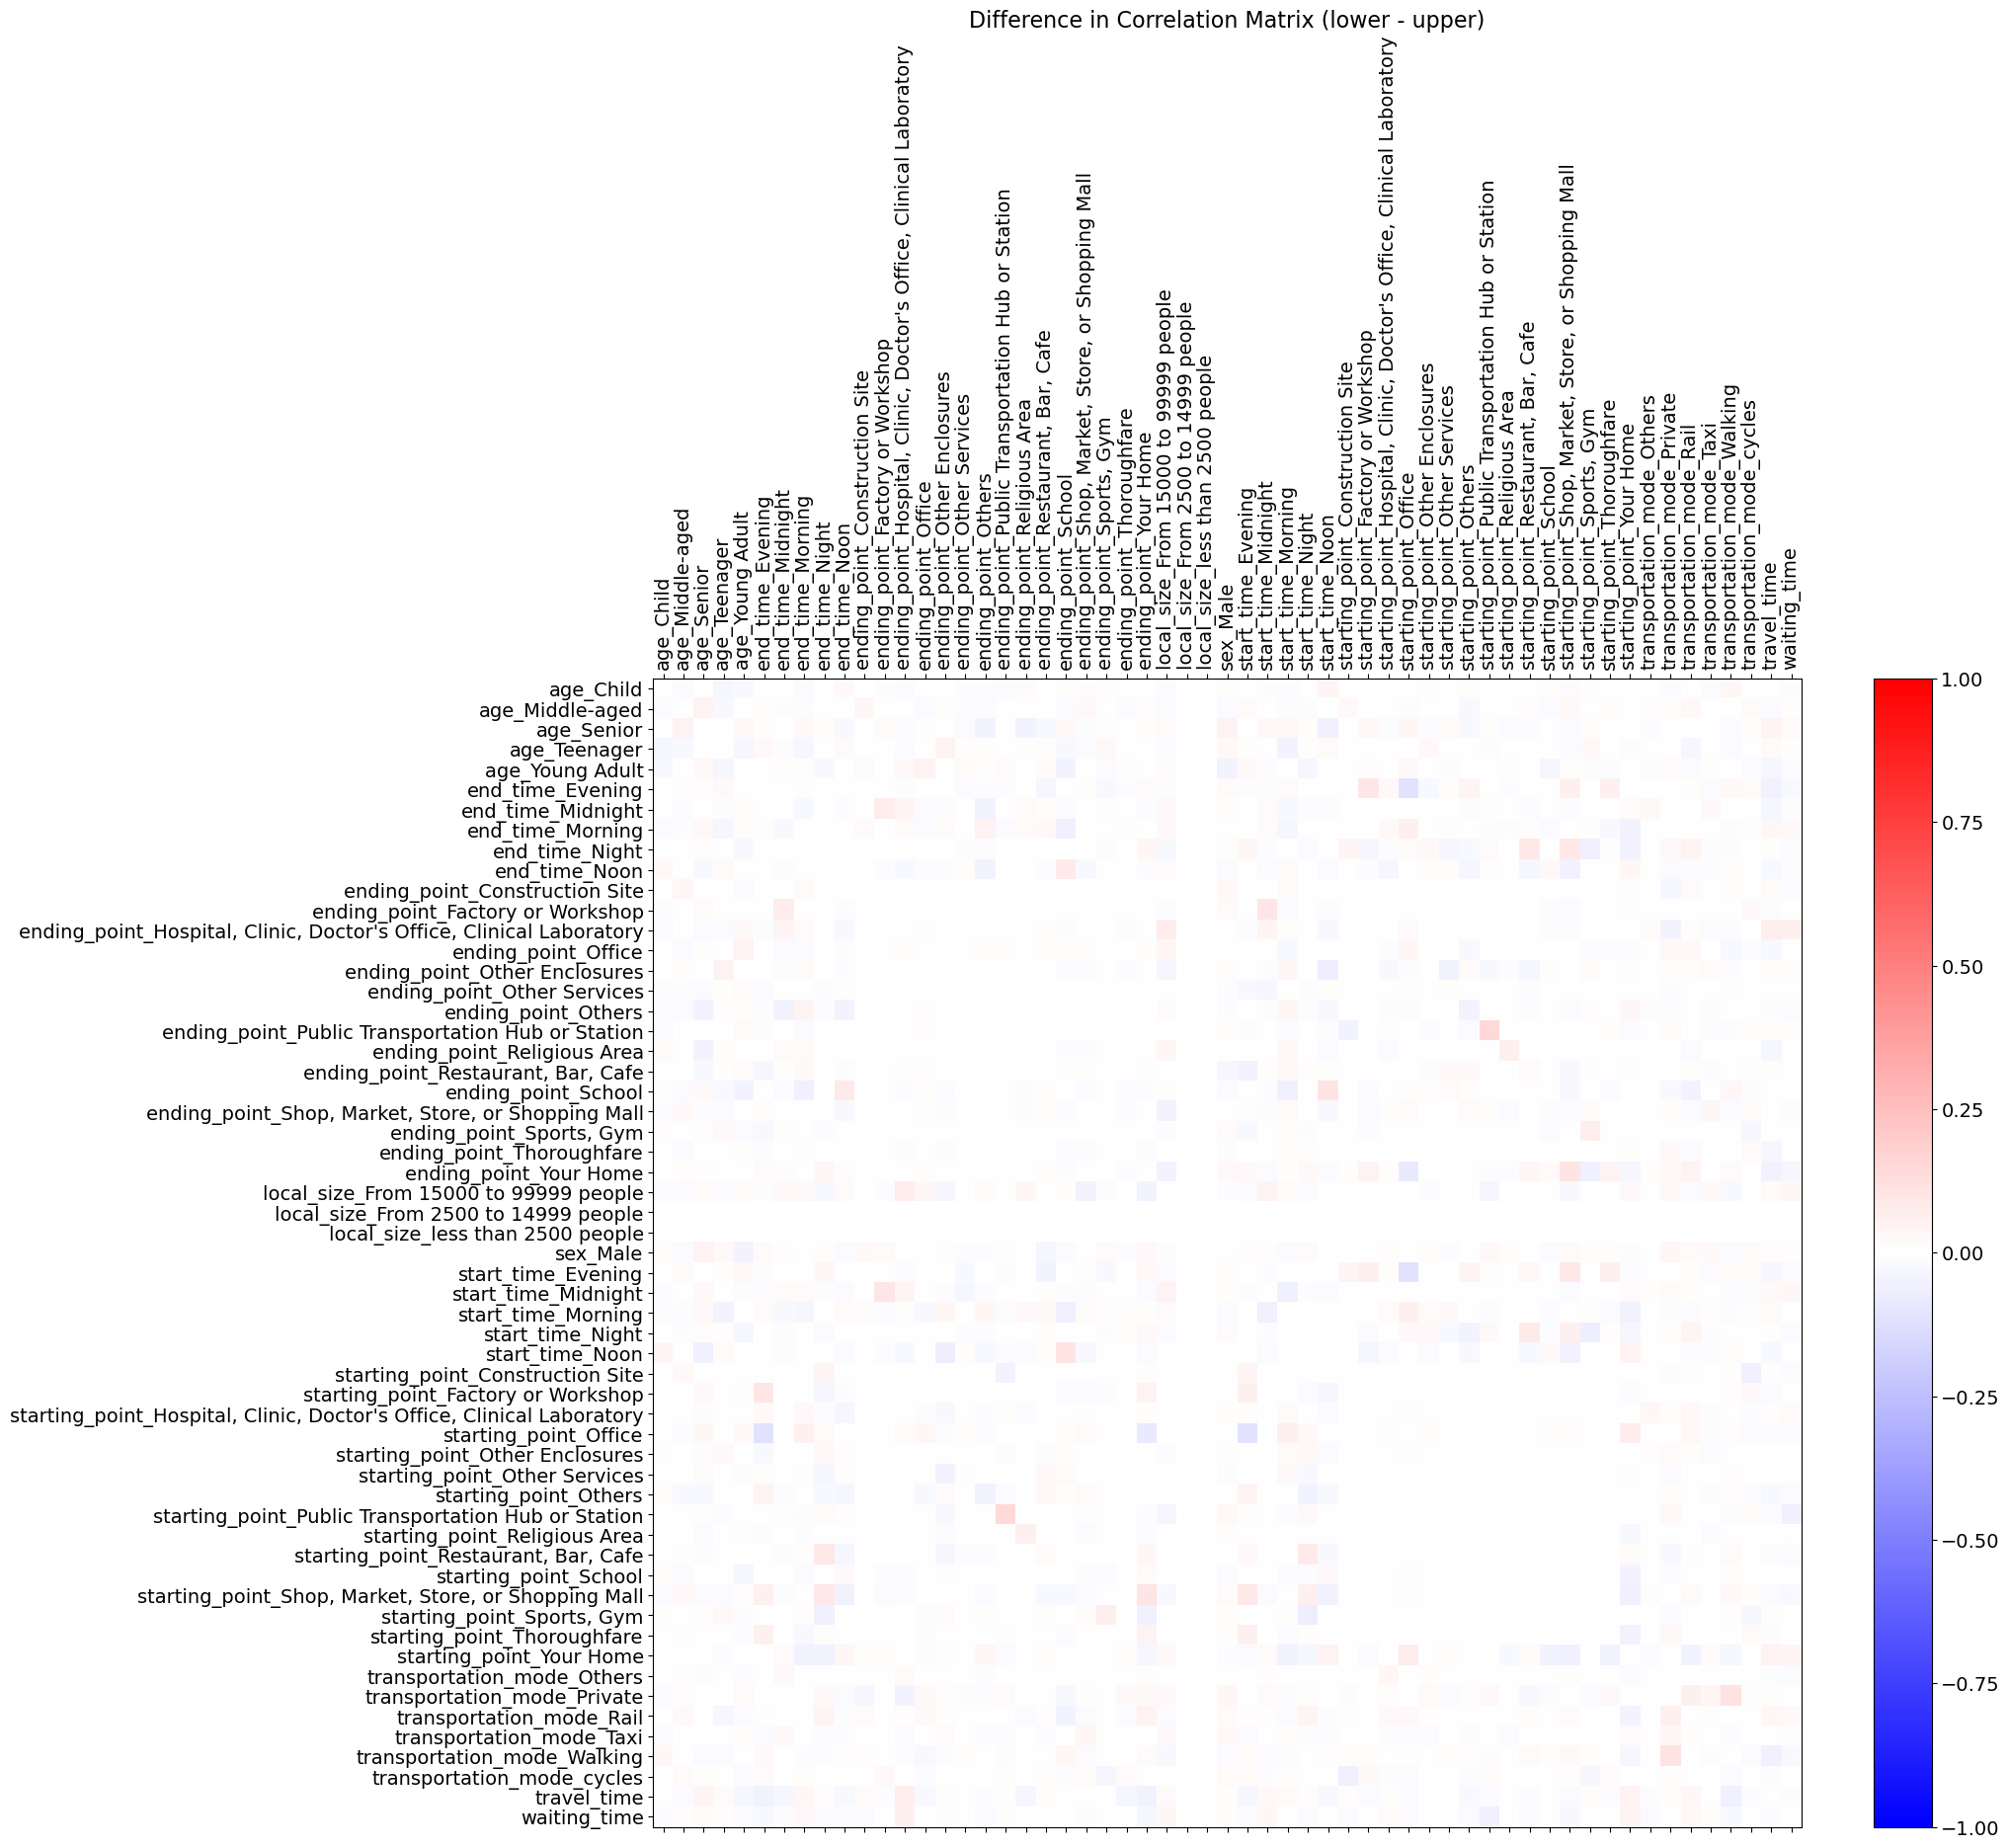

In [26]:
# Assuming `male_testing_final_int` and `female_testing_final_int` are defined
# Compute correlation matrices
corr_lower = lower_testing_final_int.corr()
corr_upper = upper_testing_final_int.corr()

# Compute the difference between the two correlation matrices
corr_diff = corr_lower - corr_upper

# Plotting the difference matrix
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))

# Use a diverging colormap with white at the center
cmap = plt.cm.bwr

# Set the background of the figure to white
f.patch.set_facecolor('white')

# Plotting the matrix with white in the middle of the color scale
plt.matshow(corr_diff, fignum=f.number, cmap=cmap, vmin=-1, vmax=1)
plt.xticks(range(corr_diff.shape[1]), corr_diff.columns, fontsize=14, rotation=90)
plt.yticks(range(corr_diff.shape[1]), corr_diff.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Difference in Correlation Matrix (lower - upper)', fontsize=16)

# Save the plot if needed
plt.savefig('correlation_difference_social_class.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.show()

In [28]:
lower_X = lower_df_predictors_selected_VIF
lower_y = lower_data_undersampled['travel_purpose']

In [27]:
upper_X = upper_df_predictors_selected_VIF
upper_y = upper_data_undersampled['travel_purpose']

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [30]:
def backward_elimination_multinomial(X, y, batch_size=100, significance_level=0.05):
    features = X.columns.tolist()
    
    while len(features) > 0:
        batch_features = [features[i:i + batch_size] for i in range(0, len(features), batch_size)]
        max_p_value = 0
        feature_to_remove = None
        
        for batch in batch_features:
            X_1 = sm.add_constant(X[batch])
            model = sm.MNLogit(y, X_1).fit(disp=0)  # 使用多类逻辑回归模型
            p_values = model.pvalues.iloc[1:].max(axis=1)  # 获取p值，跳过常数项
            
            if p_values.max() > max_p_value:
                max_p_value = p_values.max()
                feature_to_remove = p_values.idxmax()
        
        if max_p_value > significance_level:
            features.remove(feature_to_remove)
        else:
            break
    
    return features

In [32]:
def logistic_regression_analysis(X, y, test_size=0.3, random_state=42, batch_size=100, significance_level=0.05, return_features_only=False, return_feature_names=False):
    """
    执行多元逻辑回归分析，并生成混淆矩阵和分类报告。
    
    参数:
    X (DataFrame): 包含特征的数据集
    y (Series): 目标变量
    test_size (float): 测试集大小（默认 0.3）
    random_state (int): 随机种子（默认 42）
    batch_size (int): 后向筛选的批次大小（默认 100）
    significance_level (float): 后向筛选的显著性水平（默认 0.05）
    return_features_only (bool): 是否只返回筛选出的特征而不进行后续模型训练和评估（默认 False）
    return_feature_names (bool): 是否返回特征名称
    
    返回:
    如果 return_features_only 为 True，返回筛选后的特征列表；
    如果 return_feature_names 为 True，返回包含模型、结果字典和特征名称的元组；
    否则返回包含训练集和测试集准确性，混淆矩阵和分类报告的字典。
    """

    # 拆分数据集为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # 重置索引
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    # 标准化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 多项式特征变换
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # 获取特征名称
    feature_names = poly.get_feature_names_out(X.columns)
    X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)
    X_test_poly_df = pd.DataFrame(X_test_poly, columns=feature_names)

    # 执行后向筛选
    selected_features = backward_elimination_multinomial(X_train_poly_df, y_train, batch_size=batch_size, significance_level=significance_level)
    print("Selected features after backward elimination:", selected_features)

    # 如果只返回筛选的特征
    if return_features_only:
        return selected_features

    # 使用筛选后的特征集
    X_train_final = X_train_poly_df[selected_features]
    X_test_final = X_test_poly_df[selected_features]
    
    # 初始化并训练逻辑回归模型
    model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
    model.fit(X_train_final, y_train)

    # 预测
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)
    
    # 计算准确性
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # 混淆矩阵
    conf_matrix = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    
    # 打印分类报告
    report = classification_report(y_test, y_test_pred)

    # 假设类标签为具体的名称（根据实际数据替换）
    class_names = [
        "Go home", "Go to work", "Go to Study", "Go Shopping", 
        "Having fun with friends or family", "Pick up people", 
        "Execution of the program", "To receive medical care"
    ]

    # 使用类名替换数字标签，并调整图形尺寸
    fig, ax = plt.subplots(figsize=(10, 8))  # 增加图形尺寸
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.xticks(rotation=35, ha="right")  # 调整标签旋转角度和对齐方式
    plt.yticks(rotation=0)  # 保持 y 轴标签水平
    plt.title("Confusion Matrix with Class Names")
    plt.show()
    
    # 打印结果
    print("Training Accuracy: {:.4f}".format(train_accuracy))
    print("Test Accuracy: {:.4f}".format(test_accuracy))
    print("Classification Report:\n", report)
    
    # 返回模型和结果字典
    results = {
        "model": model,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "confusion_matrix": conf_matrix,
        "classification_report": report
    }
    
    if return_feature_names:
        return results, feature_names

    return results


/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid valu

Selected features after backward elimination: ['travel_time', 'waiting_time', 'starting_point_Construction Site', 'starting_point_Factory or Workshop', "starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory", 'starting_point_Office', 'starting_point_Other Enclosures', 'starting_point_Other Services', 'starting_point_Others', 'starting_point_Public Transportation Hub or Station', 'starting_point_Religious Area', 'starting_point_Restaurant, Bar, Cafe', 'starting_point_School', 'starting_point_Shop, Market, Store, or Shopping Mall', 'starting_point_Sports, Gym', 'starting_point_Thoroughfare', 'ending_point_Construction Site', 'ending_point_Factory or Workshop', "ending_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory", 'ending_point_Office', 'ending_point_Other Enclosures', 'ending_point_Other Services', 'ending_point_Others', 'ending_point_Public Transportation Hub or Station', 'ending_point_Religious Area', 'ending_point_Restaurant, Bar, Cafe', 'ending_point_

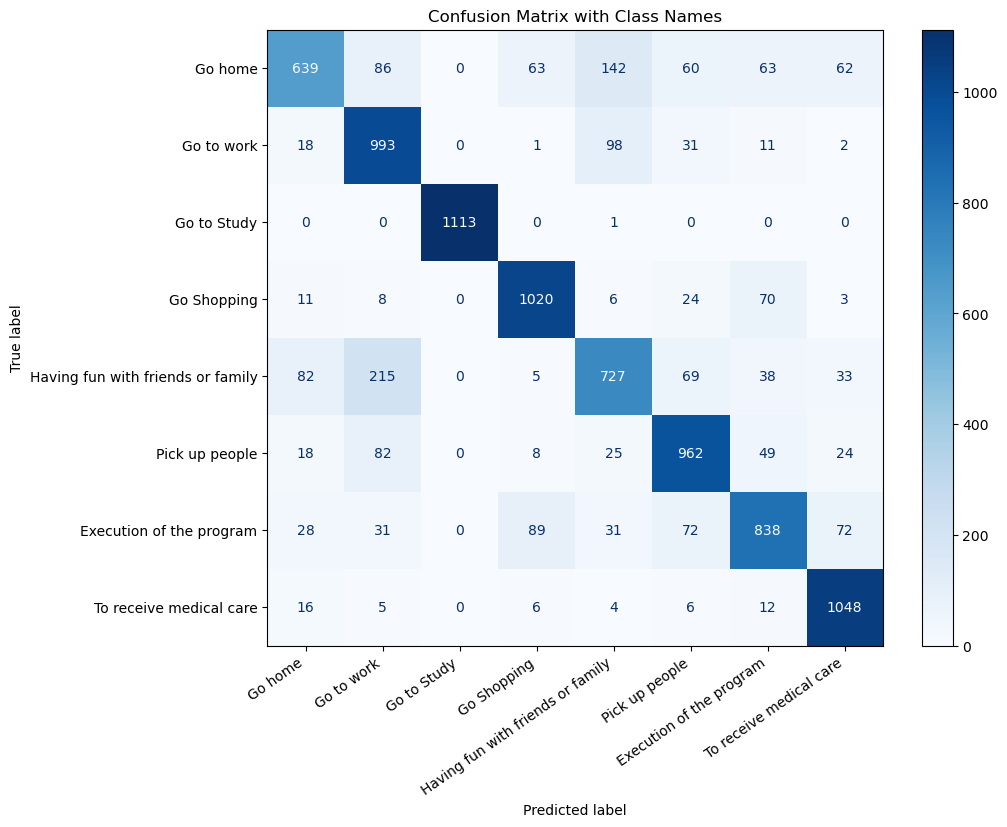

Training Accuracy: 0.8391
Test Accuracy: 0.8048
Classification Report:
                                    precision    recall  f1-score   support

         Execution of the program       0.79      0.57      0.66      1115
                      Go Shopping       0.70      0.86      0.77      1154
                          Go home       1.00      1.00      1.00      1114
                      Go to study       0.86      0.89      0.87      1142
                       Go to work       0.70      0.62      0.66      1169
Having fun with friends or family       0.79      0.82      0.80      1168
                   Pick up people       0.78      0.72      0.75      1161
          To receive medical care       0.84      0.96      0.90      1097

                         accuracy                           0.80      9120
                        macro avg       0.81      0.81      0.80      9120
                     weighted avg       0.80      0.80      0.80      9120



In [33]:
lower_results = logistic_regression_analysis(lower_X, lower_y)

/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/conda/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid valu

Selected features after backward elimination: ['travel_time', 'waiting_time', 'starting_point_Construction Site', 'starting_point_Factory or Workshop', "starting_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory", 'starting_point_Office', 'starting_point_Other Enclosures', 'starting_point_Other Services', 'starting_point_Others', 'starting_point_Public Transportation Hub or Station', 'starting_point_Religious Area', 'starting_point_Restaurant, Bar, Cafe', 'starting_point_School', 'starting_point_Shop, Market, Store, or Shopping Mall', 'starting_point_Sports, Gym', 'starting_point_Thoroughfare', 'ending_point_Construction Site', 'ending_point_Factory or Workshop', "ending_point_Hospital, Clinic, Doctor's Office, Clinical Laboratory", 'ending_point_Office', 'ending_point_Other Enclosures', 'ending_point_Other Services', 'ending_point_Others', 'ending_point_Public Transportation Hub or Station', 'ending_point_Religious Area', 'ending_point_Restaurant, Bar, Cafe', 'ending_point_

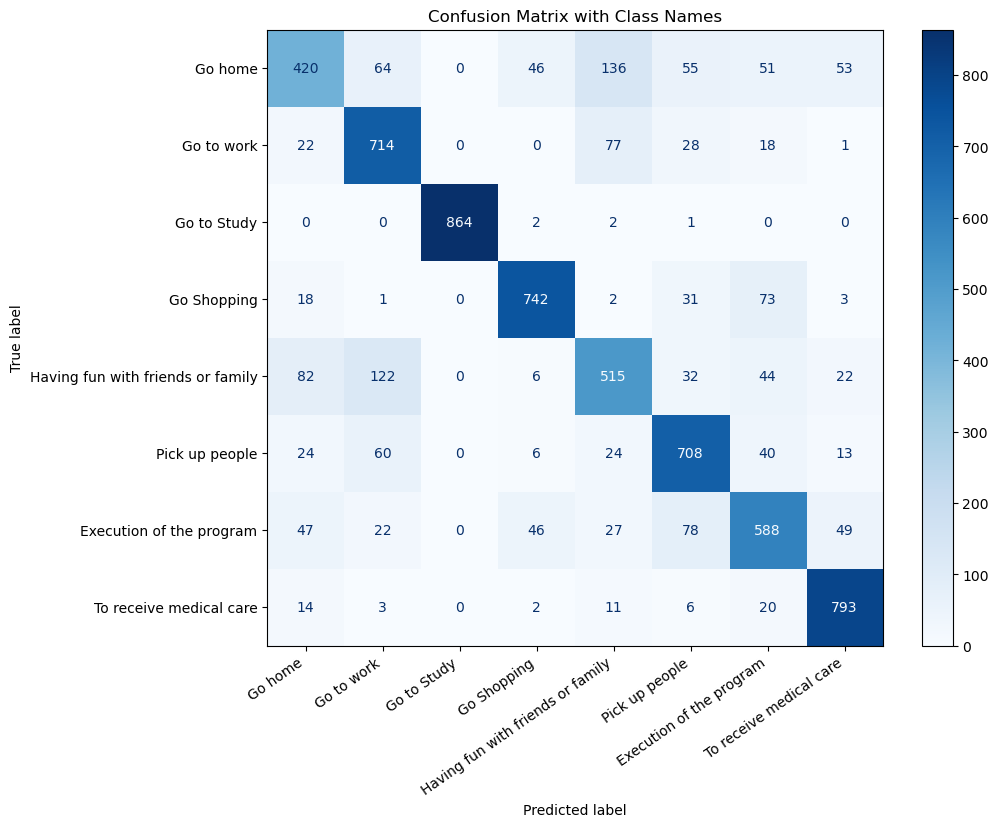

Training Accuracy: 0.8283
Test Accuracy: 0.7827
Classification Report:
                                    precision    recall  f1-score   support

         Execution of the program       0.67      0.51      0.58       825
                      Go Shopping       0.72      0.83      0.77       860
                          Go home       1.00      0.99      1.00       869
                      Go to study       0.87      0.85      0.86       870
                       Go to work       0.65      0.63      0.64       823
Having fun with friends or family       0.75      0.81      0.78       875
                   Pick up people       0.71      0.69      0.70       857
          To receive medical care       0.85      0.93      0.89       849

                         accuracy                           0.78      6828
                        macro avg       0.78      0.78      0.78      6828
                     weighted avg       0.78      0.78      0.78      6828



In [34]:
upper_results = logistic_regression_analysis(upper_X, upper_y)